# Week 3: Losses, Regularization, Evaluation

In [1]:
import numpy as np
import prtools as pr
import matplotlib.pyplot as plt

## 3.1 Ridge Regularization (L2)

Below we experiment with different regularization parameters on regression datasets of various sizes.

In [46]:
# Will be used in the next exercises
def gen_train_test_sets(train_size, test_size):
    # Generate data where inputs are drawn uniformly from [0, 1]
    x = np.random.rand(train_size + test_size, 1)
    # Generate eps value (Gaussian noise) from a std normal distribution, for each x separately
    # Outputs y = x + eps
    y = x + np.random.randn(train_size + test_size, 1)
    # Split into training and test data
    x_train = x[:train_size]
    y_train = y[:train_size]
    x_test = x[train_size:]
    y_test = y[train_size:]
    print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
    train_set = pr.gendatr(x_train, y_train)
    test_set = pr.gendatr(x_test, y_test)
    return train_set, test_set

(2, 1) (2, 1) (1000, 1) (1000, 1)
2 by 1 prdataset with continuous targets.
Ridge regression, 1 to 1 trained mapping
MSE:  1.299615541027948


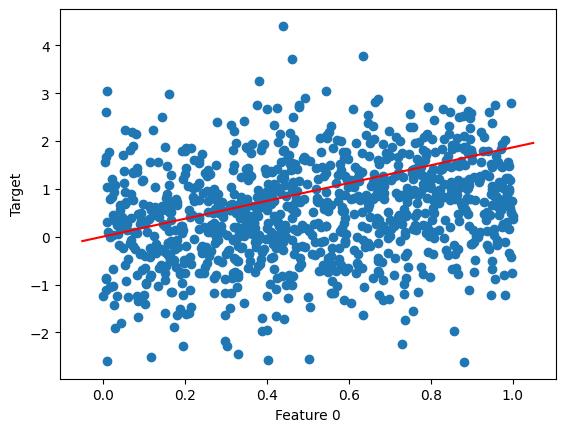

In [47]:
# Generate data where inputs are drawn uniformly from [0, 1]
train_data, test_data = gen_train_test_sets(2, 1000)
print(train_data)
pr.scatterr(test_data)

# Use ridger to fit a linear model to the data using L2 regularization
# TODO: Study the regression fit to the training data + squared loss for different amounts of regularization (in the range [10^-3, 10^3])
# TODO: Estimate the squared error using a somewhat larger test set!
R = pr.ridger(train_data, (0.001, False))   # regresssor without bias i.e. intercept w_0
print(R)
err = pr.testr(test_data, R, 'mse')
print('MSE: ', err)
pr.plotr(R, color='r')


*NOTE: given a regression data set of fixed size, one would typically use **cross-validation** to tune the regularization parameter.*

i.e. train `N` separate classifiers by rotating through your dataset `n` times, where all `n-1` chunks are used for training and 1 for testing.

(2, 1) (2, 1) (1000, 1) (1000, 1)


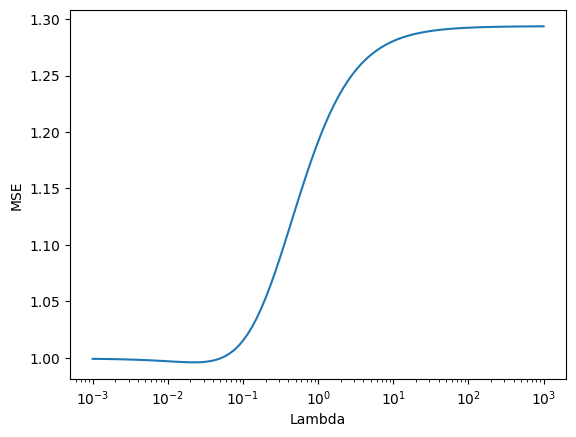

(10, 1) (10, 1) (1000, 1) (1000, 1)


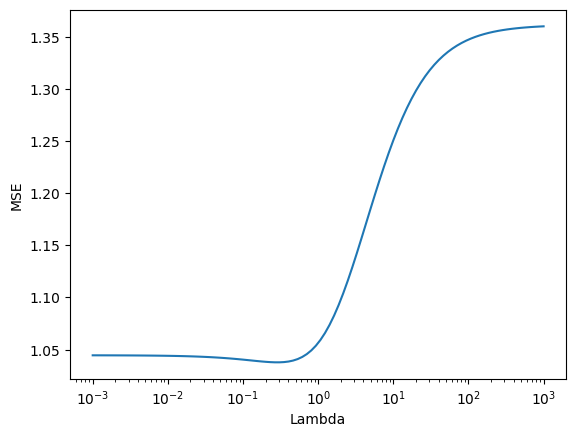

(100, 1) (100, 1) (1000, 1) (1000, 1)


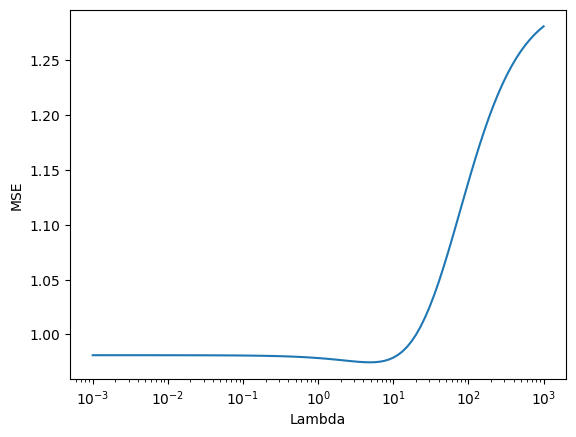

In [49]:
def plot_ridge_reg(train_size, test_size, lambdas):
    """Plots the MSE (y-axis) for different values of regularization param lambda (x-axis)"""
    train_data, test_data = gen_train_test_sets(train_size, test_size)
    mse = []
    for l in lambdas:
        R = pr.ridger(train_data, (l, False))
        mse.append(pr.testr(test_data, R, 'mse'))
    plt.plot(lambdas, mse)
    plt.xlabel('Lambda')
    plt.ylabel('MSE')
    plt.xscale('log')
    plt.show()

# TODO: determine optimal lambda for different train set sizes: 2, 10, 100
plot_ridge_reg(2, 1000, np.logspace(-3, 3, 100))  # Take 100 values between 10^-3 and 10^3 spaced evenly on a log scale
plot_ridge_reg(10, 1000, np.logspace(-3, 3, 100))
plot_ridge_reg(100, 1000, np.logspace(-3, 3, 100))

# It seems that the larger the train set, the higher the optimal lambda


## 3.3 LASSO Regularization (L1)

### Least Absolute Shrinkage and Selection Operator

- This type of regression uses L1 norm instead of L2
- Automatically reduces features that the final regressor depends on!

*In contrast to L2 regularization, entries of optimal `w` can become 0 for a finite no. of $\lambda$ - most often `w2` but for even larger $\lambda$* also the other entry will become 0

## 3.7 Sources of Variation

Below we investigate the difference in behavior of the error on the training and test set.

In [58]:
N = 30
errs = np.zeros(N)
test_set = pr.gendath([500, 500])
# Repeatedly generate a new training set and test it on the same test set
# Thus variance in the error is only due to variability in the training set
for i in range (N):
    train_set = pr.gendath([20, 20])
    w = pr.ldc(train_set)
    errs[i] = pr.testr(test_set, w, 'mse')
print(errs)
print(np.mean(errs))
print(np.std(errs))

[1.35118039 1.31716552 1.40295792 1.36085463 1.34556648 1.34236482
 1.34610402 1.30839906 1.38041047 1.33016975 1.33979632 1.35250907
 1.35263765 1.35989659 1.38077799 1.35847763 1.31439517 1.40959815
 1.35118156 1.32070799 1.32283197 1.46846921 1.38950081 1.37387084
 1.30780661 1.32787243 1.38079124 1.34072151 1.34094315 1.33569244]
1.3537883794939167
0.03372469971623696


Now we do the same thing but regenerate the test set instead.

In [60]:
N = 30
errs = np.zeros(N)
train_set = pr.gendath([20, 20])
# Repeatedly generate a new training set and test it on the same test set
# Thus variance in the error is only due to variability in the training set
for i in range (N):
    test_set = pr.gendath([500, 500])
    w = pr.ldc(train_set)
    errs[i] = pr.testr(test_set, w, 'mse')
print(errs)
print(np.mean(errs))
# NOTE: Since test set is relatively large, variation in error is much smaller
print(np.std(errs))

[1.3824288  1.38143357 1.37752194 1.37986098 1.38480639 1.38338165
 1.37725203 1.3824638  1.38348107 1.37843359 1.38171503 1.38205482
 1.37962104 1.37971019 1.37766837 1.37954402 1.38055588 1.37743682
 1.38578797 1.38001868 1.38087614 1.3794394  1.38072215 1.38217133
 1.3808947  1.38464941 1.3795199  1.38122475 1.38148496 1.37867838]
1.3808279251841291
0.0021917571427469682


## 3.8 Learning Curves

These are curves that plot classification errors against the training set size - in PRTools `cleval`.
The discrepancy between training and test curve is overfiting.

We are going to study these for different data sets and classifiers.

Highleyman dataset 2000 by 62 prdataset with 2 classes: [1000 1000]


(array([[0.46581197, 0.35416667, 0.47649573],
        [0.16571101, 0.19323394, 0.16743119],
        [0.11962366, 0.13978495, 0.13844086],
        [0.09733607, 0.1147541 , 0.10245902]]),
 array([[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.00195312, 0.00390625, 0.00195312],
        [0.0234375 , 0.01464844, 0.01171875]]))

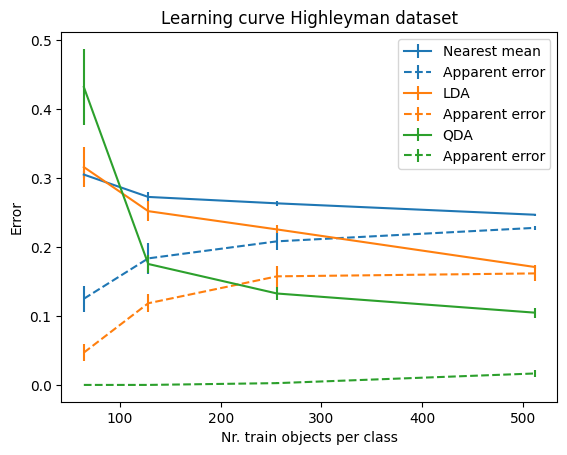

In [79]:
# Generate 2D Highleyman classes with 1000 samples per class
a = pr.gendath([1000, 1000])
# Enlarge the feature dim by adding 60 dims of class independent randomness i.e. plain noise
noise = np.random.randn(2000, 60)  # 2000 samples, 60 features
a.data = np.hstack((a.data, noise))
# a.concatenate(noise, axis=1)     # this does not do anything?
print(a)
# pr.scatterd(a)

# Use cleval to generate learning curves for NMC, LDC, QDA using train set sizes 64, 128, 256 and 512 - repeat often enough!
pr.cleval(a,pr.nmc(), [64, 128, 256, 512])
pr.cleval(a,pr.ldc(), [64, 128, 256, 512])
pr.cleval(a,pr.qdc(), [64, 128, 256, 512])
# plt.legend()

# NOTE: test curves go down, training curves go up - both converge in the end which is why they intersect
# More flexible classifiers (e.g. QDA) get a lower asymptotic error (i.e. lower test error), but need enough training data!

Below we study the learning curve for the 1-NN classifier (has 0 apparent error!).

Banana dataset 2000 by 62 prdataset with 2 classes: [1000 1000]


(array([[0.10950855, 0.11057692, 0.10202991],
        [0.09690367, 0.09002294, 0.09575688],
        [0.09005376, 0.09543011, 0.09610215],
        [0.09016393, 0.08196721, 0.08504098]]),
 array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]))

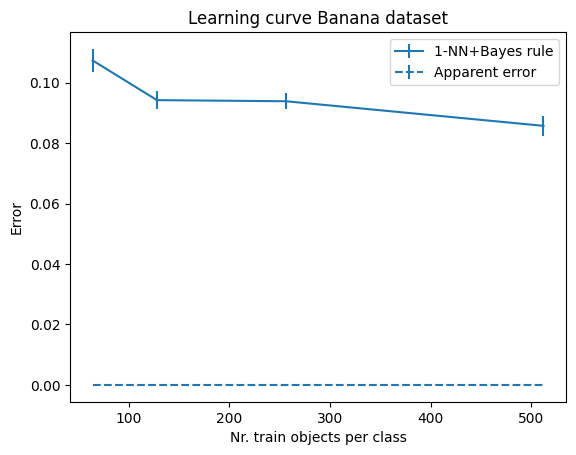

In [81]:
# Generate 2D Highleyman classes with 1000 samples per class
a = pr.gendatb([1000, 1000])
# Enlarge the feature dim by adding 60 dims of class independent randomness i.e. plain noise
noise = np.random.randn(2000, 60)  # 2000 samples, 60 features
a.data = np.hstack((a.data, noise))
print(a)

# Use cleval to generate learning curves for NMC, LDC, QDA using train set sizes 64, 128, 256 and 512 - repeat often enough!
pr.cleval(a, pr.knnc(), [64, 128, 256, 512])